In [1]:
###Ch02

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = 'data/bitlyexamples.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
records = [json.loads(line) for line in open(path)]

In [5]:
print(type(records))
print(records[0])
print(len(records))

<class 'list'>
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}
3560


In [6]:
# records is a list of python dictionaries
records[0]['tz']

'America/New_York'

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
# This gives the list of unique timezones - > list(set(time_zones))
# There are 97 unique timezones
len(list(set(time_zones)))

97

In [8]:
#Code to get the count of each timezone in the data
from collections import defaultdict
count = defaultdict(int)
for rec in records:
    if 'tz'in rec:
        x = rec['tz']
        count[x] = count[x] +1

In [9]:
frame = pd.DataFrame(records)
frame.iloc[0:5]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [10]:
frame['tz'].value_counts()

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
Asia/Kuching                    1
America/Argentina/Cordoba       1
America/Costa_Rica              1
America/Santo_Domingo           1
America/St_Kitts                1
Name: tz, Length: 97, dtype: int64

<AxesSubplot:>

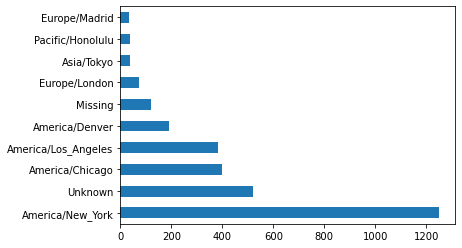

In [11]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz==''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10].plot(kind='barh',rot=0)

In [12]:
# the field a contains the browser used for conversion.
print(frame['a'][1])
print(frame['a'][50])

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2


<AxesSubplot:>

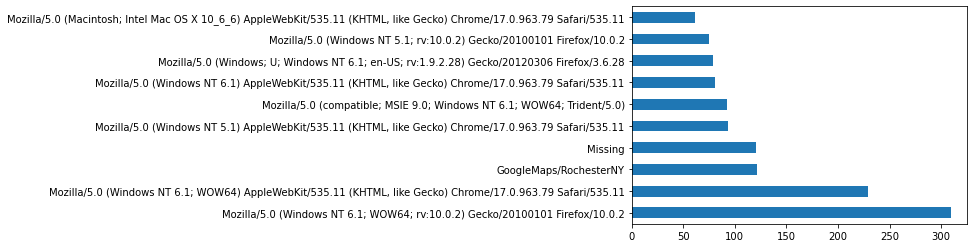

In [13]:
clean_a = frame['a'].fillna('Missing')
clean_a[clean_a==''] = 'Unknown'
a_count = clean_a.value_counts()
a_count[:10].plot(kind='barh',rot=0)

In [14]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [15]:
cframe = frame[frame.a.notnull()]
cframe['operating_system'] = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

C:\Users\user\anaconda3\envs\learn\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
by_tz_os = cframe.groupby(['tz','operating_system'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:5]

operating_system,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


<AxesSubplot:ylabel='tz'>

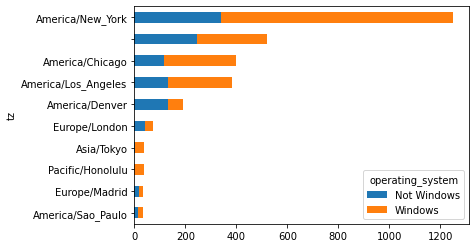

In [17]:
indexer = agg_counts.sum(1).argsort()
# take function used to select the relevant rows.
count_subset = agg_counts.take(indexer)[-10:]
count_subset.plot(kind='barh',stacked=True)

In [18]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/movielens/users.dat', sep='::', header=None,names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/movielens/ratings.dat', sep='::', header=None,names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movielens/movies.dat', sep='::', header=None,names=mnames)

C:\Users\user\anaconda3\envs\learn\lib\site-packages\pandas\io\parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [19]:
users[:5]
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
data=pd.merge(pd.merge(ratings,users),movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [21]:
# Getting the mean rating of each movie by pivot table.
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings[0:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [22]:
#getting the number of ratings for each movie
ratings_by_title = data.groupby(['title']).size()
print(type(ratings_by_title))
active_titles = ratings_by_title.index[ratings_by_title>250]
active_titles

<class 'pandas.core.series.Series'>


Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1214)

In [23]:
mean_ratings.loc[active_titles][:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [24]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings[:5]

gender,F,M,diff
title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,-0.613095
'Night Mother (1986),3.388889,3.352941,-0.035948
'Til There Was You (1997),2.675676,2.733333,0.057658
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,-0.139547


In [25]:
sorted_by_diff = mean_ratings.sort_values(['diff'])
sorted_by_diff[:5]

gender,F,M,diff
title,,,
"James Dean Story, The (1957)",4.000000,1.000000,-3.000000
Country Life (1994),5.000000,2.000000,-3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,-3.000000
Babyfever (1994),3.666667,1.000000,-2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,-2.571429


In [26]:
# How this works?
# Works the group by is written without reset_ined, which means that the data frame is still indexed on the grouping column,
# and therefore, the loc column can directly filter on the indices.
data.groupby(['title']).agg({'rating':'std'}).loc[active_titles][:5]

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


In [27]:
## Getting the names data det by concatenating all the files
years = list(range(1880,2011))
names = pd.DataFrame()
for year in years:
    fname = f'data/babynames/yob{year}.txt'
    columns = ['name','sex','births']
    frame = pd.read_csv(fname,names=columns)
    frame['year'] = year
    names = pd.concat([names,frame])
names[:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [28]:
print(len(names))

1690784


In [29]:
names.pivot_table('births',index='year',columns='sex',aggfunc=sum)[:5]

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [30]:
##  A trick to do a partitioning function.
## This is accomplished by using group by and a user defined function.
def birthnamepct(group):
    group['namepct'] = round((group['births']/group['births'].sum())*100,0)
    return(group)
xx = names.groupby(['year','sex']).apply(birthnamepct)

In [31]:
xx[:5]

,name,sex,births,year,namepct
0,Mary,F,7065,1880,8.0
1,Anna,F,2604,1880,3.0
2,Emma,F,2003,1880,2.0
3,Elizabeth,F,1939,1880,2.0
4,Minnie,F,1746,1880,2.0


In [32]:
## Another example - getting the top 3 names in each combination of year and gender.
## The function receives a group  - which is essentially a subset of the data frame for a particular value of the group -eg. 1800,F
## The function receives the subset only when it is called through the apply function.
## In the previous example, the group is returned after adding an extra column to it.
## In this example, a single list is returned for every value in the group
## Getting the top 3 names in each group - year,gender
def top3names(group):
    return(list(group.sort_values(['births'],ascending=False)[:3]['name']))
xy = names.groupby(['year','sex']).apply(top3names)

In [33]:
xy[:5]

year  sex
1880  F          [Mary, Anna, Emma]
      M      [John, William, James]
1881  F          [Mary, Anna, Emma]
      M      [John, William, James]
1882  F          [Mary, Anna, Emma]
dtype: object

In [34]:
## Another interesting problem- getting the top 2 names and their counts for each year, gender.

def gettop1000(group):
    return group.sort_values(['births'])[:2]

xz = names.groupby(['year','sex']).apply(gettop1000)
xz

name sex  births  year
year sex                                   
1880 F   941        Wilma   F       5  1880
         862        Estie   F       5  1880
     M   1999   Zachariah   M       5  1880
         1902       Flora   M       5  1880
1881 F   937        Viney   F       5  1881
...                   ...  ..     ...   ...
2009 M   33238  Haroutyun   M       5  2009
2010 F   19697  Zyrihanna   F       5  2010
         17798   Greenlea   F       5  2010
     M   33837      Zzyzx   M       5  2010
         32490     Gemari   M       5  2010

[524 rows x 4 columns]

In [35]:
## Ch03

In [36]:
data = {i:round(np.random.randn(),2) for i in range(7)}
print(data)

{0: -0.9, 1: 0.11, 2: 1.13, 3: 1.75, 4: 1.92, 5: 0.68, 6: 1.52}


In [37]:
def add_numbers(a, b):
    """
    Add two numbers together
    Returns
    -------
    the_sum : type of arguments
    """
    return a+b

In [38]:
# THIS IS AN AWESOME FEATURE 
add_numbers?

Signature: add_numbers(a, b)
Docstring:
Add two numbers together
Returns
-------
the_sum : type of arguments
File:      c:\users\user\code\learningpy\pandasrelearn\<ipython-input-37-3d8bb8063b97>
Type:      function


In [39]:
np.*load*?

np.__loader__
np.load
np.loads
np.loadtxt

In [40]:
## Will need to come back to chapter 3 - especially some of the good stuffs related to profiling.

In [41]:
## Ch04 - Jumping to chapter 4, which at this point seems ore relevant.

In [42]:
# ndarray is the basic unit of numpy 
data = [1,2,3,4,5,6,7,8]
arr = np.array(data)
type(arr)

numpy.ndarray

In [43]:
print(arr.shape)
print(arr.dtype)

(8,)
int32


In [44]:
arr = arr.reshape(2,4)

In [45]:
print(arr)
print(arr.shape)
print(arr.dtype)

[[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int32


In [46]:
print(np.zeros((2,2)))
print(np.ones((2,2)))

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]


In [47]:
print(list(range(0,2)))
print(np.arange(2))

[0, 1]
[0 1]


In [48]:
# Modifying the data type
arr = arr.astype('float64')

In [49]:
print(arr)
print(arr.shape)
print(arr.dtype)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
(2, 4)
float64


In [50]:
arr = np.arange(10)
print(arr[5])
print(arr[5:8])

5
[5 6 7]


In [51]:
arr[5:8]=12
print(arr)

[ 0  1  2  3  4 12 12 12  8  9]


In [52]:
arr_slice = arr[5:8]
arr_slice[1]= 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [53]:
arr_slice[:] = 64
print(arr)

[ 0  1  2  3  4 64 64 64  8  9]


In [54]:
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr2d[2])
print(arr2d[2][1])

[7 8 9]
8


In [55]:
arr2d[1:,1:]

array([[5, 6],
       [8, 9]])

In [56]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [57]:
print(names == 'Bob')
print(names != 'Bob')

[ True False False  True False False False]
[False  True  True False  True  True  True]


In [58]:
data[names=='Bob',2:]

array([[ 1.61154922, -0.87993818],
       [-0.91945876, -2.17387838]])

In [59]:
data[~(names == 'Bob')]

array([[ 0.6411511 ,  1.81825512, -0.57159475, -0.80179778],
       [ 0.91421664,  1.31500592, -0.20518959,  0.89255454],
       [ 0.55234272,  1.2669488 , -0.90245256, -1.81685476],
       [-0.69740674,  0.89570733, -0.31566858,  0.55112332],
       [-0.2396169 ,  0.16350533,  1.18239956,  0.01340102]])

In [60]:
mask = (names == 'Bob') | (names == 'Will')
data[mask,]

array([[ 1.25816616, -0.68963256,  1.61154922, -0.87993818],
       [ 0.91421664,  1.31500592, -0.20518959,  0.89255454],
       [-0.85077461,  0.05958468, -0.91945876, -2.17387838],
       [ 0.55234272,  1.2669488 , -0.90245256, -1.81685476]])

In [61]:
data[data<0] = 0
data

array([[1.25816616, 0.        , 1.61154922, 0.        ],
       [0.6411511 , 1.81825512, 0.        , 0.        ],
       [0.91421664, 1.31500592, 0.        , 0.89255454],
       [0.        , 0.05958468, 0.        , 0.        ],
       [0.55234272, 1.2669488 , 0.        , 0.        ],
       [0.        , 0.89570733, 0.        , 0.55112332],
       [0.        , 0.16350533, 1.18239956, 0.01340102]])

In [62]:
data[names != 'Joe']=7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.6411511 , 1.81825512, 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.89570733, 0.        , 0.55112332],
       [0.        , 0.16350533, 1.18239956, 0.01340102]])

In [63]:
arr=np.empty((8,4))
for i in range(8):
    arr[i] = i
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [64]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [65]:
arr = np.arange(15).reshape((3, 5))
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [66]:
arr = np.random.randn(6,3)
print(arr)
print(np.dot(arr.T,arr))

[[ 0.49345675 -0.86218498 -0.79569079]
 [-0.56827386 -1.215459    1.94190001]
 [ 0.0910746   0.26057745  0.9227028 ]
 [ 2.2930777  -0.47767964  1.35653278]
 [ 1.86015246  1.89958112 -0.86643016]
 [ 0.46435698  0.94501297  2.00589177]]
[[ 9.50872922  3.16597189  1.01825748]
 [ 3.16597189  7.01823991 -1.83208038]
 [ 1.01825748 -1.83208038 11.86996417]]


In [67]:
arr = np.arange(10).reshape((2,5))
print(np.sqrt(arr))
print(np.exp(arr))

[[0.         1.         1.41421356 1.73205081 2.        ]
 [2.23606798 2.44948974 2.64575131 2.82842712 3.        ]]
[[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
  5.45981500e+01]
 [1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
  8.10308393e+03]]


In [68]:
arr =np.random.randn(7) *5
np.modf(arr)

(array([ 0.85440285, -0.45473891, -0.4607159 ,  0.49105218, -0.30236654,
        -0.17214573, -0.67264771]),
 array([ 4., -3., -4.,  2., -8., -9., -7.]))

In [69]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

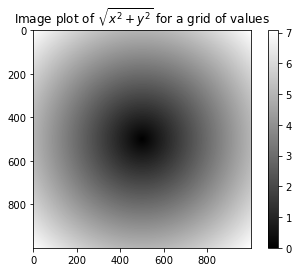

In [70]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [71]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [72]:
# The above is a slow and wordy way of doing the stuff.
# np.where is a faster and better (vectorized) way of doing this.
# Vectorization - parallelelism through SIMD architecture.

In [73]:
arr = np.random.randn(4, 4)
arr

array([[-0.7801343 , -1.39914925,  0.14793731,  0.1773535 ],
       [ 0.94863857, -1.91957229, -0.69169246, -1.76862819],
       [ 0.07644277, -0.23262643, -0.59676703, -0.29157008],
       [-0.16684904,  0.51575865,  0.14201947,  2.33548372]])

In [74]:
np.where(arr>0,2,-2)

array([[-2, -2,  2,  2],
       [ 2, -2, -2, -2],
       [ 2, -2, -2, -2],
       [-2,  2,  2,  2]])

In [75]:
np.where(arr>0,2,arr)

array([[-0.7801343 , -1.39914925,  2.        ,  2.        ],
       [ 2.        , -1.91957229, -0.69169246, -1.76862819],
       [ 2.        , -0.23262643, -0.59676703, -0.29157008],
       [-0.16684904,  2.        ,  2.        ,  2.        ]])

In [76]:
arr = np.random.randn(5,4)
print(arr)
print(arr.mean())
print(np.mean(arr))

[[ 1.56515373 -0.1535495   0.25482295  0.76501681]
 [-1.06231492  0.09073337 -2.05374424  0.80844189]
 [ 1.44980668  0.22517325 -1.82489676  0.65423161]
 [ 1.38523052  0.38877923 -0.73531585 -0.00513742]
 [ 1.58766964 -0.71872537  0.49935655  1.23043949]]
0.21755858334637085
0.21755858334637085


In [77]:
print(arr.mean(axis=0))

[ 0.98510913 -0.0335178  -0.77195547  0.69059847]


In [78]:
print(arr.mean(axis=1))

[ 0.607861   -0.55422097  0.1260787   0.25838912  0.64968508]


In [79]:
arr = np.arange(15).reshape(5,3)
print(arr)
print(arr.cumsum(0))
print(arr.cumsum(1))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]
 [18 22 26]
 [30 35 40]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]
 [ 9 19 30]
 [12 25 39]]


In [80]:
arr = np.random.randn(100)
(arr>0).sum()

49

In [81]:
bools = np.array([False, False, True, False])
print(bools)
print(bools.any())
print(bools.all())

[False False  True False]
True
False


In [82]:
arr = np.random.randn(10)
print(arr)
arr.sort()
print(arr)

[-0.26481566  0.79269092  0.84648096  0.08137353 -0.58200875  0.4816488
  1.76465745 -0.27293275  0.32531231 -1.01988168]
[-1.01988168 -0.58200875 -0.27293275 -0.26481566  0.08137353  0.32531231
  0.4816488   0.79269092  0.84648096  1.76465745]


In [83]:
arr = np.random.randn(5,3)
print(arr)
arr.sort()
print(arr)

[[-5.09511005e-01  1.87888522e+00 -2.37345428e-01]
 [ 1.64014540e+00 -1.14908427e+00 -4.21242176e-01]
 [ 1.76192457e+00 -6.49273258e-01  1.33594188e+00]
 [-1.72696759e-01  1.19130383e+00 -5.21942258e-04]
 [ 1.90376671e-01  1.75203696e+00  9.87960470e-01]]
[[-5.09511005e-01 -2.37345428e-01  1.87888522e+00]
 [-1.14908427e+00 -4.21242176e-01  1.64014540e+00]
 [-6.49273258e-01  1.33594188e+00  1.76192457e+00]
 [-1.72696759e-01 -5.21942258e-04  1.19130383e+00]
 [ 1.90376671e-01  9.87960470e-01  1.75203696e+00]]


In [84]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [85]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [86]:
arr = np.random.randn(5,3)
print(arr)
np.save('data/nmp/some_array.npy', arr)

[[ 1.47335711  0.90777695 -0.04316421]
 [ 1.42278061  0.81870839 -0.73756321]
 [ 0.67065038 -1.06196366  0.3383751 ]
 [-2.30241029 -0.48378453  0.3611983 ]
 [ 0.1656138  -0.5233808   0.39554072]]


In [87]:
x = np.load('data/nmp/some_array.npy')
print(x)

[[ 1.47335711  0.90777695 -0.04316421]
 [ 1.42278061  0.81870839 -0.73756321]
 [ 0.67065038 -1.06196366  0.3383751 ]
 [-2.30241029 -0.48378453  0.3611983 ]
 [ 0.1656138  -0.5233808   0.39554072]]


In [88]:
np.savez('data/nmp/array_archive.npz', a=arr, b=arr)

In [89]:
arch = np.load('data/nmp/array_archive.npz')
print(arch['a'])
print(arch['b'])

[[ 1.47335711  0.90777695 -0.04316421]
 [ 1.42278061  0.81870839 -0.73756321]
 [ 0.67065038 -1.06196366  0.3383751 ]
 [-2.30241029 -0.48378453  0.3611983 ]
 [ 0.1656138  -0.5233808   0.39554072]]
[[ 1.47335711  0.90777695 -0.04316421]
 [ 1.42278061  0.81870839 -0.73756321]
 [ 0.67065038 -1.06196366  0.3383751 ]
 [-2.30241029 -0.48378453  0.3611983 ]
 [ 0.1656138  -0.5233808   0.39554072]]


In [90]:
x = np.random.randn(5,3)
y = np.random.randn(3,2)
res = np.dot(x,y)
res

array([[-1.01915534, -0.87520068],
       [ 1.59106242, -0.70371455],
       [ 0.32830486, -2.26975455],
       [-2.39512613,  0.50682766],
       [-1.09568019, -1.0180519 ]])

In [91]:
np.dot(x.T,x)

array([[ 2.88068696,  0.32898561, -0.64102767],
       [ 0.32898561,  3.71873475, -0.333249  ],
       [-0.64102767, -0.333249  ,  0.22602512]])

In [92]:
from numpy.linalg import inv, qr
inv(np.dot(x.T,x))

array([[ 1.05814708,  0.20200971,  3.29884167],
       [ 0.20200971,  0.34841278,  1.08661385],
       [ 3.29884167,  1.08661385, 15.38219179]])

In [93]:
np.dot(inv(np.dot(x.T,x)),np.dot(x.T,x))

array([[ 1.00000000e+00, -1.85190765e-16,  1.58160407e-16],
       [-2.38540040e-17,  1.00000000e+00,  6.70511933e-19],
       [ 5.73375221e-16, -4.48633726e-16,  1.00000000e+00]])

In [94]:
mat = np.dot(x.T,x)
q,r = qr(mat)
print(q)
print(r)

[[-0.97011496  0.12294549  0.2091922 ]
 [-0.11079088 -0.99145211  0.06890635]
 [ 0.21587577  0.04367049  0.97544376]]
[[-2.96942846 -0.80309616  0.70758483]
 [ 0.         -3.66105328  0.2614596 ]
 [ 0.          0.          0.06341383]]


In [95]:
### Chapter 5

In [96]:
obj = pd.Series([1,2,3,4,5])
print(obj.values)
print(obj.index)

[1 2 3 4 5]
RangeIndex(start=0, stop=5, step=1)


In [97]:
print(type(obj))
print(type(obj.values))
print(type(obj.index))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [98]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

print(obj2)
print('\n')
print(obj2.values)
print(obj2.index)
print('\n')
print(type(obj2))
print(type(obj2.values))
print(type(obj2.index))

d    4
b    7
a   -5
c    3
dtype: int64


[ 4  7 -5  3]
Index(['d', 'b', 'a', 'c'], dtype='object')


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.indexes.base.Index'>


In [99]:
print(obj2['a'])
print(obj2['d'])
print(obj2[['a','d']])

-5
4
a   -5
d    4
dtype: int64


In [100]:
## NumPy array operations, such as filtering with a boolean array, scalar multiplication,
## or applying math functions, will preserve the index-value link:

print(obj2[obj2 > 0])
print(obj2 * 2)

d    4
b    7
c    3
dtype: int64
d     8
b    14
a   -10
c     6
dtype: int64


In [101]:
## Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping
## of index values to data values
print('b' in obj2)
print('e' in obj2)

True
False


In [102]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
print(obj3)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [103]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
print(obj4)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


In [104]:
print(pd.isnull(obj4))
print(obj4.isnull())

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [105]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [106]:
# Interesting - see how indixes work. 
# REspective indices are added here.
print(obj3)
print('--------------')
print(obj4)
print('--------------')
print(obj3+obj4)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
--------------
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
--------------
California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [107]:
# also interesting is how Nan is treated. 
# See the utah data - 5000 + Nan = Nan
5000 + np.NaN

nan

In [108]:
obj4.name='population'
obj4.index.name='state'
print(obj4)

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64


In [109]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [110]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],index=['one', 'two', 'three', 'four', 'five'])
frame2
## debt appears as Nanbecause there is o column for debt in the data dictionary

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [111]:
# Columns of the frame can be extracted as series in 2 ways
print(frame2['year'])
print(type(frame2['year']))
print('========================================')
print(frame2.year)
print(type(frame2.year))

## Note that the returned series has the same index as the data frame.

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64
<class 'pandas.core.series.Series'>
one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64
<class 'pandas.core.series.Series'>


In [112]:
frame2.loc[['one','two']]

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN


In [113]:
frame2.iloc[1,2]

1.7

In [114]:
frame2['debt'] = 16.5
frame2['debt'] = np.arange(5)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4


In [115]:
# A series can also be assigned. In these cases, the index will be matched exactly.
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [116]:
# Adding a new column and assigning value at the same time.
frame2['east'] = frame2['state'] == 'Ohio'
frame2

,year,state,pop,debt,east
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [117]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
print(frame3)
print(frame3.T)

      Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5
        2001  2002  2000
Nevada   2.4   2.9   NaN
Ohio     1.7   3.6   1.5


In [118]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [119]:
pdata = {'Ohio': frame3['Ohio'][:-1],'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [120]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [121]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [122]:
print(frame2)
frame2.values

       year   state  pop  debt   east
one    2000    Ohio  1.5   NaN   True
two    2001    Ohio  1.7  -1.2   True
three  2002    Ohio  3.6   NaN   True
four   2001  Nevada  2.4  -1.5  False
five   2002  Nevada  2.9  -1.7  False


array([[2000, 'Ohio', 1.5, nan, True],
       [2001, 'Ohio', 1.7, -1.2, True],
       [2002, 'Ohio', 3.6, nan, True],
       [2001, 'Nevada', 2.4, -1.5, False],
       [2002, 'Nevada', 2.9, -1.7, False]], dtype=object)

In [123]:
type(frame2.values)

numpy.ndarray

In [124]:
frame2.values.dtype

dtype('O')

In [125]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [126]:
print(type(index))

<class 'pandas.core.indexes.base.Index'>


In [127]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [128]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [129]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [130]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [131]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [132]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [133]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [134]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [135]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [136]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [137]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [138]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [139]:
data.drop(['two'],axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [140]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(obj)
print('==========')
print(obj['b'])
print('==========')
print(obj[1])
print('==========')
print(obj[2:4])
print('==========')
print(obj[['b','a']])
print('==========')
print(obj[[1, 3]])
print('==========')
print(obj[obj < 2])

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
1.0
1.0
c    2.0
d    3.0
dtype: float64
b    1.0
a    0.0
dtype: float64
b    1.0
d    3.0
dtype: float64
a    0.0
b    1.0
dtype: float64


In [141]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
print(data)
print('==========')
print(data['two'])
print('==========')
print(data[['three', 'one']])
print('==========')
print(data[:2])
print('==========')
print(data[data['three'] > 5])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32
          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [142]:
print(data < 5)
data[data < 5] = 0
print(data)

            one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False
          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [143]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [144]:
data.loc[['Colorado', 'Utah'], ['two', 'three']]

,two,three
Colorado,5,6
Utah,9,10


In [145]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

print(s1)
print('==========')
print(s2)
print('==========')
print(s1+s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64
a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [146]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1)
print('==========')
print(df2)
print('==========')
print(df1+df2)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
            b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN


In [147]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
print(df1)
print('==========')
print(df2)
print('==========')
print(df1+df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0
      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN


In [148]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [149]:
arr[0]

array([0., 1., 2., 3.])

In [150]:
arr-arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [151]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(frame)
print('==============')
series = frame.iloc[0]
print(series)
print('==============')
print(frame-series)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64
          b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0


In [152]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
print(frame)
print('==============')
print(series2)
print('==============')
print(frame + series2)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0
e    1
f    2
dtype: int64
          b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN


In [153]:
series3 = frame['d']
print(frame)
print('==============')
print(series3)
print('==============')
print(frame.sub(series3,axis=0))
### The axis number that you pass is the axis to match on. In this case we mean to match
### on the DataFrame’s row index and broadcast across.

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64
          b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0


In [154]:
frame-series3

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(frame)
print('==============')
print(np.abs(frame))
print('==============')
f = lambda x: x.max() - x.min()
print(frame.apply(f,axis=0))
print('==============')
print(frame.apply(f,axis=1))

               b         d         e
Utah    0.501580  0.321044 -0.549123
Ohio    0.875596  0.432860  1.143710
Texas   0.836685 -1.198561 -0.914726
Oregon -0.528687 -0.557374 -1.183963
               b         d         e
Utah    0.501580  0.321044  0.549123
Ohio    0.875596  0.432860  1.143710
Texas   0.836685  1.198561  0.914726
Oregon  0.528687  0.557374  1.183963
b    1.404283
d    1.631421
e    2.327672
dtype: float64
Utah      1.050703
Ohio      0.710849
Texas     2.035246
Oregon    0.655276
dtype: float64


In [156]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

print(frame)
print('==============')
print(frame.apply(f,axis=0))
print('==============')
print(frame.apply(f,axis=1))

               b         d         e
Utah    0.501580  0.321044 -0.549123
Ohio    0.875596  0.432860  1.143710
Texas   0.836685 -1.198561 -0.914726
Oregon -0.528687 -0.557374 -1.183963
            b         d         e
min -0.528687 -1.198561 -1.183963
max  0.875596  0.432860  1.143710
             min       max
Utah   -0.549123  0.501580
Ohio    0.432860  1.143710
Texas  -1.198561  0.836685
Oregon -1.183963 -0.528687


In [157]:
format = lambda x: '%.2f' % x
print(frame)
print('==============')
print(frame.applymap(format))
print('==============')
print(frame['e'].map(format))

               b         d         e
Utah    0.501580  0.321044 -0.549123
Ohio    0.875596  0.432860  1.143710
Texas   0.836685 -1.198561 -0.914726
Oregon -0.528687 -0.557374 -1.183963
            b      d      e
Utah     0.50   0.32  -0.55
Ohio     0.88   0.43   1.14
Texas    0.84  -1.20  -0.91
Oregon  -0.53  -0.56  -1.18
Utah      -0.55
Ohio       1.14
Texas     -0.91
Oregon    -1.18
Name: e, dtype: object


In [158]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
print('==============')
print(obj)
print('==============')
print(obj.sort_index())

d    0
a    1
b    2
c    3
dtype: int64
a    1
b    2
c    3
d    0
dtype: int64


In [159]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],columns=['d', 'a', 'b', 'c'])
print('==============')
print(frame)
print('==============')
print(frame.sort_index())
print('==============')
print(frame.sort_index(axis=1))
print('==============')
print(frame.sort_index(axis=1, ascending=False))

       d  a  b  c
three  0  1  2  3
one    4  5  6  7
       d  a  b  c
one    4  5  6  7
three  0  1  2  3
       a  b  c  d
three  1  2  3  0
one    5  6  7  4
       d  c  b  a
three  0  3  2  1
one    4  7  6  5


In [160]:
obj = pd.Series([4, 7, -3, 2])
print('==============')
print(obj.sort_values())

2   -3
3    2
0    4
1    7
dtype: int64


In [161]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
print('==============')
print(obj.sort_values())

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64


In [162]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print('==============')
print(frame)
print('==============')
print(frame.sort_values(['a']))
print('==============')
print(frame.sort_values(['b']))

   b  a
0  4  0
1  7  1
2 -3  0
3  2  1
   b  a
0  4  0
2 -3  0
1  7  1
3  2  1
   b  a
2 -3  0
3  2  1
0  4  0
1  7  1


In [163]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],index=['a', 'b', 'c', 'd'],columns=['one', 'two'])
print('==============')
print(df)
print('==============')
print(df.sum())
print('==============')
print(df.sum(axis=1))

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3
one    9.25
two   -5.80
dtype: float64
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64


In [164]:
print('==============')
print(df.mean(axis=1,skipna=False))

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64


In [165]:
print(df.cumsum())

    one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8


In [166]:
print(df.describe())

            one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000


In [176]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
print(obj)
print('=================')
print(obj.unique())
print('=================')
print(obj.value_counts())

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object
['c' 'a' 'd' 'b']
c    3
a    3
b    2
d    1
dtype: int64


In [177]:
mask = obj.isin(['b', 'c'])
print(obj)
print('=================')
print(mask)
print('=================')
print(obj[mask])

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object
0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool
0    c
5    b
6    b
7    c
8    c
dtype: object


In [179]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],'Qu2': [2, 3, 1, 2, 3],'Qu3': [1, 5, 2, 4, 4]})
print(data)
print('=================')
result = data.apply(pd.value_counts).fillna(0)
print('=================')
print(result)

   Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4
   Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0


In [183]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
print(string_data)
print('=================')
print(string_data.isnull())
print('=================')
string_data[0] = None
print('=================')
print(string_data.isnull())
print('=================')
print(string_data.notnull())
print('=================')
print(string_data.fillna('missing'))

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object
0    False
1    False
2     True
3    False
dtype: bool
0     True
1    False
2     True
3    False
dtype: bool
0    False
1     True
2    False
3     True
dtype: bool
0      missing
1    artichoke
2      missing
3      avocado
dtype: object


In [186]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
print(data)
print('=================')
print(data.dropna())
print('=================')
print(data[data.notnull()])

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64


In [191]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
print(data)
print('=================')
print(data.dropna(how='any'))
print('=================')
print(data.dropna(how='all'))
data[4] = NA
print('=================')
print(data)
print('=================')
print(data.dropna(axis=1, how='all'))

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
     0    1    2
0  1.0  6.5  3.0
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0
     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


In [199]:
df = pd.DataFrame(np.random.randn(7, 3))
print(df)
print('=================')
print(df.loc[:4,1])
print('=================')
df.loc[:4,1] = NA
df.loc[:3,2] = NA
print('=================')
print(df)
print('=================')
print(df.fillna(0))
print('=================')
print(df.fillna({1: 0.5, 2: -1}))

          0         1         2
0 -0.350338 -0.929666  0.161338
1 -0.408603 -0.019751 -0.538941
2 -0.643404 -0.683159 -0.790293
3  0.267914 -1.210860 -1.599176
4 -0.995853  0.552636 -0.631807
5  1.443986 -0.409488 -0.351689
6 -0.197857  1.635230 -0.512744
0   -0.929666
1   -0.019751
2   -0.683159
3   -1.210860
4    0.552636
Name: 1, dtype: float64
          0         1         2
0 -0.350338       NaN       NaN
1 -0.408603       NaN       NaN
2 -0.643404       NaN       NaN
3  0.267914       NaN       NaN
4 -0.995853       NaN -0.631807
5  1.443986 -0.409488 -0.351689
6 -0.197857  1.635230 -0.512744
          0         1         2
0 -0.350338  0.000000  0.000000
1 -0.408603  0.000000  0.000000
2 -0.643404  0.000000  0.000000
3  0.267914  0.000000  0.000000
4 -0.995853  0.000000 -0.631807
5  1.443986 -0.409488 -0.351689
6 -0.197857  1.635230 -0.512744
          0         1         2
0 -0.350338  0.500000 -1.000000
1 -0.408603  0.500000 -1.000000
2 -0.643404  0.500000 -1.000000
3  0.26791

In [205]:
data = pd.Series(np.random.randn(10),index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],[1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
print(data)
print('=================')
print(data.index)
print('=================')
print(data['b'])
print('=================')
print(data['b':'c'])
print('=================')
print(data.loc[['b','c']])

a  1    0.131102
   2    0.409375
   3   -0.540434
b  1    0.950412
   2   -0.850285
   3   -0.445459
c  1   -0.268368
   2   -0.670372
d  2   -0.631602
   3   -0.233858
dtype: float64
MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )
1    0.950412
2   -0.850285
3   -0.445459
dtype: float64
b  1    0.950412
   2   -0.850285
   3   -0.445459
c  1   -0.268368
   2   -0.670372
dtype: float64
b  1    0.950412
   2   -0.850285
   3   -0.445459
c  1   -0.268368
   2   -0.670372
dtype: float64


In [206]:
print(data.unstack())
print('=======================')
print(data.unstack().stack())

          1         2         3
a  0.131102  0.409375 -0.540434
b  0.950412 -0.850285 -0.445459
c -0.268368 -0.670372       NaN
d       NaN -0.631602 -0.233858
a  1    0.131102
   2    0.409375
   3   -0.540434
b  1    0.950412
   2   -0.850285
   3   -0.445459
c  1   -0.268368
   2   -0.670372
d  2   -0.631602
   3   -0.233858
dtype: float64


In [208]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],columns=[['Ohio', 'Ohio', 'Colorado'],['Green', 'Red', 'Green']])
print(frame)
print('===============================')
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
print(frame)

     Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11
state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11


In [212]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],'d': [0, 1, 2, 0, 1, 2, 3]})
print(frame)
print('===================')
frame2 = frame.set_index(['c', 'd'])
print(frame2)
print('===================')
frame2.reset_index()

   a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3
       a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1


,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [214]:
## Ch07

In [216]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

print(df1)
print('===============')
print(df2)
print('===============')
print(pd.merge(df1,df2))

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


In [222]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data2': range(3)})

print(df3)
print('===============')
print(df4)
print('===============')
print(pd.merge(df3,df4,left_on='lkey',right_on='rkey'))
print('===============')
print(pd.merge(df3,df4,left_on='lkey',right_on='rkey',how='left'))
print('===============')
print(pd.merge(df3,df4,left_on='lkey',right_on='rkey',how='right'))
print('===============')
print(pd.merge(df3,df4,left_on='lkey',right_on='rkey',how='outer'))

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6
  rkey  data2
0    a      0
1    b      1
2    d      2
  lkey  data1 rkey  data2
0    b      0    b      1
1    b      1    b      1
2    b      6    b      1
3    a      2    a      0
4    a      4    a      0
5    a      5    a      0
  lkey  data1 rkey  data2
0    b      0    b    1.0
1    b      1    b    1.0
2    a      2    a    0.0
3    c      3  NaN    NaN
4    a      4    a    0.0
5    a      5    a    0.0
6    b      6    b    1.0
  lkey  data1 rkey  data2
0    a    2.0    a      0
1    a    4.0    a      0
2    a    5.0    a      0
3    b    0.0    b      1
4    b    1.0    b      1
5    b    6.0    b      1
6  NaN    NaN    d      2
  lkey  data1 rkey  data2
0    b    0.0    b    1.0
1    b    1.0    b    1.0
2    b    6.0    b    1.0
3    a    2.0    a    0.0
4    a    4.0    a    0.0
5    a    5.0    a    0.0
6    c    3.0  NaN    NaN
7  NaN    NaN    d    2.0


In [224]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],'key2': ['one', 'two', 'one'],'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],'key2': ['one', 'one', 'one', 'two'],'rval': [4, 5, 6, 7]})
print(left)
print('===============')
print(right)
print('===============')
print(pd.merge(left, right, on=['key1', 'key2'], how='outer'))

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
  key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7
  key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0


In [227]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print(left1)
print('===============')
print(right1)
print('===============')
print(pd.merge(left1, right1, left_on='key', right_index=True))
print('===============')
print(pd.merge(left1, right1, left_on='key', right_index=True, how='outer'))

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN


In [231]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],'key2': [2000, 2001, 2002, 2001, 2002],'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],[2001, 2000, 2000, 2000, 2001, 2002]],columns=['event1', 'event2'])
print(lefth)
print('===============')
print(righth)
print('===============')
print(pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True))
print('===============')
pd.merge(lefth, righth, left_on=['key1', 'key2'],right_index=True, how='outer')

     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11
     key1  key2  data  event1  event2
0    Ohio  2000   0.0       4       5
0    Ohio  2000   0.0       6       7
1    Ohio  2001   1.0       8       9
2    Ohio  2002   2.0      10      11
3  Nevada  2001   3.0       0       1


,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [233]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
print(left2)
print('===============')
print(right2)
print('===============')
print(pd.merge(left2, right2, how='outer', left_index=True, right_index=True))

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0
   Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0


In [234]:
arr = np.arange(12).reshape((3, 4))
print(arr)
print('====================')
print(np.concatenate([arr, arr], axis=1))
print('====================')
print(np.concatenate([arr, arr], axis=0))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [237]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
print('====================')
print(pd.concat([s1, s2, s3],axis=0))
print('====================')
print(pd.concat([s1, s2, s3],axis=1))

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64
     0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0


In [244]:
print(s1)
print('====================')
print(s3)
print('====================')
s4 = pd.concat([s1 * 5, s3])
print(s4)
print('====================')
pd.concat([s1, s4], axis=1)
print('====================')
pd.concat([s1, s4], axis=1,join='inner')

a    0
b    1
dtype: int64
f    5
g    6
dtype: int64
a    0
b    5
f    5
g    6
dtype: int64


,0,1
a,0,0
b,1,5


In [249]:
print(s1)
print('====================')
print(s4)
print('====================')
print(pd.concat([s1, s4], axis=1, join='inner'))
print('====================')
print(pd.concat([s1, s4], axis=1, join='outer'))

a    0
b    1
dtype: int64
a    0
b    5
f    5
g    6
dtype: int64
   0  1
a  0  0
b  1  5
     0  1
a  0.0  0
b  1.0  5
f  NaN  5
g  NaN  6


In [251]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
print(result)
print('====================')
print(result.unstack())

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64
         a    b    f    g
one    0.0  1.0  NaN  NaN
two    0.0  1.0  NaN  NaN
three  NaN  NaN  5.0  6.0


In [252]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [254]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],columns=['three', 'four'])
print('===================')
print(df1)
print('===================')
print(df2)
print('===================')
print(pd.concat([df1, df2], axis=1, keys=['level1', 'level2']))

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8
  level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0


In [255]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [257]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
print('===================')
print(df1)
print('===================')
print(df2)
print('===================')
print(pd.concat([df1, df2], ignore_index=True))

          a         b         c         d
0  1.674306  1.031019  1.145802 -0.682751
1  1.123544 -0.162216  0.851217  0.397870
2 -0.867433 -0.552641 -1.092933  1.540970
          b         d         a
0  0.052227  0.872024  0.912013
1  0.333883  0.194426  1.822241
          a         b         c         d
0  1.674306  1.031019  1.145802 -0.682751
1  1.123544 -0.162216  0.851217  0.397870
2 -0.867433 -0.552641 -1.092933  1.540970
3  0.912013  0.052227       NaN  0.872024
4  1.822241  0.333883       NaN  0.194426


In [259]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),index=pd.Index(['Ohio', 'Colorado'], name='state'),columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [260]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [261]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [262]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [263]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [265]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
print(s1)
print('==============')
print(s2)
print('==============')
data2 = pd.concat([s1, s2], keys=['one', 'two'])
print(data2)

a    0
b    1
c    2
d    3
dtype: int64
c    4
d    5
e    6
dtype: int64
one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64


In [266]:
print(data2.unstack())

       a    b    c    d    e
one  0.0  1.0  2.0  3.0  NaN
two  NaN  NaN  4.0  5.0  6.0


In [267]:
print(data2.unstack().stack())

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64


In [268]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [272]:
df = pd.DataFrame({'left': result, 'right': result + 5},columns=pd.Index(['left', 'right'], name='side'))
print(df)
print('====================')
print(df.unstack())
print('====================')
df.unstack('state').stack('side')

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10
side     left           right          
number    one two three   one two three
state                                  
Ohio        0   1     2     5   6     7
Colorado    3   4     5     8   9    10


state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

In [274]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [275]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [276]:
###drop_duplicates returns a DataFrame where the duplicated array is True:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [280]:
data['v1'] = range(7)
print(data)
print('====================')
print(data.drop_duplicates())
print('====================')
print(data.drop_duplicates(subset=['k1']))
print('====================')
print(data.drop_duplicates(subset=['k1', 'k2']))

    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6
    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6
    k1  k2  v1
0  one   1   0
3  two   3   3
    k1  k2  v1
0  one   1   0
2  one   2   2
3  two   3   3
5  two   4   5


In [284]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
print(data)

meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

print('====================================')

##The map method on a Series accepts a function or dict-like object containing a mapping,
##but here we have a small problem in that some of the meats above are capitalized and
##others are not

data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
print(data)

print('====================================')
##We could also have passed a function that does all the work:
data['food'].map(lambda x: meat_to_animal[x.lower()])

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [290]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
print(data)
print('=========================')
print(data.replace(-999, np.nan))
print('=========================')
print(data.replace([-999, -1000], np.nan))
print('=========================')
print(data.replace([-999, -1000], [np.nan, 0]))
print('=========================')
print(data.replace({-999: np.nan, -1000: 0}))

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [297]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
print(data)
print('====================================')
data.index = data.index.map(str.upper)
print(data)
print('====================================')
data.columns = data.columns.map(str.upper)
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11
          ONE  TWO  THREE  FOUR
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


In [298]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [300]:
data.rename(index={'OHIO': 'INDIANA'},columns={'THREE': 'peekaboo'})

,ONE,TWO,peekaboo,FOUR
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [301]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,ONE,TWO,THREE,FOUR
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [312]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
print(cats)
print('====================')
print(pd.DataFrame({'ages':ages,'cats':cats}))

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
    ages       cats
0     20   (18, 25]
1     22   (18, 25]
2     25   (18, 25]
3     27   (25, 35]
4     21   (18, 25]
5     23   (18, 25]
6     37   (35, 60]
7     31   (25, 35]
8     61  (60, 100]
9     45   (35, 60]
10    41   (35, 60]
11    32   (25, 35]


In [310]:
print(type(cats))

<class 'pandas.core.arrays.categorical.Categorical'>


In [311]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [313]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [314]:
data = np.random.rand(20)
print(data)
print('==========================')
print(pd.cut(data, 4, precision=2))

[0.99209422 0.7143939  0.84676677 0.76025898 0.88143416 0.99346137
 0.96357754 0.27077933 0.67115349 0.47630297 0.90723417 0.52478825
 0.6872312  0.46720415 0.10691312 0.81565819 0.51638918 0.3168965
 0.73774598 0.0739132 ]
[(0.76, 0.99], (0.53, 0.76], (0.76, 0.99], (0.53, 0.76], (0.76, 0.99], ..., (0.76, 0.99], (0.3, 0.53], (0.3, 0.53], (0.53, 0.76], (0.073, 0.3]]
Length: 20
Categories (4, interval[float64]): [(0.073, 0.3] < (0.3, 0.53] < (0.53, 0.76] < (0.76, 0.99]]


In [317]:
data = np.random.randn(20)
cats = pd.qcut(data, 4)
print(data)
print('=========================')
print(pd.DataFrame({'data':data,'cats':cats}))
print('=========================')
print(pd.value_counts(cats))

[ 0.27926843 -0.60660964 -0.06763864  0.99004368  0.23244477 -1.23927318
  0.49747271  1.39074182 -0.97939422 -0.62677306 -1.53547366 -2.53781689
  1.59026815  1.14735513  2.83297916  0.20481094  0.32022356  0.60535972
  0.83280694 -0.40734002]
        data                           cats
0   0.279268                 (0.256, 0.872]
1  -0.606610                (-0.612, 0.256]
2  -0.067639                (-0.612, 0.256]
3   0.990044                 (0.872, 2.833]
4   0.232445                (-0.612, 0.256]
5  -1.239273  (-2.5389999999999997, -0.612]
6   0.497473                 (0.256, 0.872]
7   1.390742                 (0.872, 2.833]
8  -0.979394  (-2.5389999999999997, -0.612]
9  -0.626773  (-2.5389999999999997, -0.612]
10 -1.535474  (-2.5389999999999997, -0.612]
11 -2.537817  (-2.5389999999999997, -0.612]
12  1.590268                 (0.872, 2.833]
13  1.147355                 (0.872, 2.833]
14  2.832979                 (0.872, 2.833]
15  0.204811                (-0.612, 0.256]
16  0.3

In [319]:
np.random.seed(12345)
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [320]:
col = data[3]
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [323]:
## To select all rows having a value exceeding 3 or -3, you can use the any method on a
## boolean DataFrame
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [326]:
df = pd.DataFrame(np.arange(5 * 4).reshape(5, 4))
sampler = np.random.permutation(5)
print(sampler)
print('==========================')
print(df)
print('==========================')
print(df.take(sampler))

[1 3 4 0 2]
    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
    0   1   2   3
1   4   5   6   7
3  12  13  14  15
4  16  17  18  19
0   0   1   2   3
2   8   9  10  11


In [327]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3


In [333]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})
print(df)
print('=========================')
x=pd.get_dummies(df['key'])
print(x)
print('=========================')
print(pd.concat([df,x],axis=1))

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0
  key  data1  a  b  c
0   b      0  0  1  0
1   b      1  0  1  0
2   a      2  1  0  0
3   c      3  0  0  1
4   a      4  1  0  0
5   b      5  0  1  0


In [334]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [335]:
###Ch09

In [337]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],'data1' : np.random.randn(5),'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.351209,0.921576
1,a,two,-1.232035,0.324968
2,b,one,2.064980,0.203775
3,b,two,0.363731,0.348862
4,a,one,0.057599,0.516009


In [338]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [339]:
print(grouped)
# This is a groupby object.

In [341]:
print(grouped.mean())
print(grouped.sum())

key1
a   -0.508549
b    1.214356
Name: data1, dtype: float64
key1
a   -1.525646
b    2.428711
Name: data1, dtype: float64


In [342]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.146805
      two    -1.232035
b     one     2.064980
      two     0.363731
Name: data1, dtype: float64

In [343]:
means.unstack()

key2,one,two
key1,,
a,-0.146805,-1.232035
b,2.064980,0.363731


In [344]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -1.232035
            2006    2.064980
Ohio        2005    0.006261
            2006    0.057599
Name: data1, dtype: float64

In [345]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.146805  0.718793
     two  -1.232035  0.324968
b    one   2.064980  0.203775
     two   0.363731  0.348862

In [348]:
## The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data
for name, group in df.groupby('key1'):
    print(name)

a
b


In [349]:
for name, group in df.groupby('key1'):
    print(group)

  key1 key2     data1     data2
0    a  one -0.351209  0.921576
1    a  two -1.232035  0.324968
4    a  one  0.057599  0.516009
  key1 key2     data1     data2
2    b  one  2.064980  0.203775
3    b  two  0.363731  0.348862


In [352]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one -0.351209  0.921576
4    a  one  0.057599  0.516009
a two
  key1 key2     data1     data2
1    a  two -1.232035  0.324968
b one
  key1 key2    data1     data2
2    b  one  2.06498  0.203775
b two
  key1 key2     data1     data2
3    b  two  0.363731  0.348862


In [355]:
people = pd.DataFrame(np.random.randn(5, 5),columns=['a', 'b', 'c', 'd', 'e'],index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
print(people)
mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}
print('========================================')
by_column = people.groupby(mapping, axis=1)
print(by_column.sum())

               a         b         c         d         e
Joe     0.129264  1.755877  1.202160  0.678673 -1.734925
Steve   0.095015 -0.891921  0.399043 -0.513523  0.012068
Wes    -1.328098 -0.937166  0.180871 -1.556026  1.282255
Jim     0.110224  1.671774 -0.526405 -0.117170  0.758011
Travis -1.219038  0.331071 -0.713086  0.637441  0.229268
            blue       red
Joe     1.880833  0.150215
Steve  -0.114479 -0.784839
Wes    -1.375155 -0.983009
Jim    -0.643575  2.540009
Travis -0.075646 -0.658698


In [357]:
print(people)
print('=========================')
print(people.groupby(len).sum())

               a         b         c         d         e
Joe     0.129264  1.755877  1.202160  0.678673 -1.734925
Steve   0.095015 -0.891921  0.399043 -0.513523  0.012068
Wes    -1.328098 -0.937166  0.180871 -1.556026  1.282255
Jim     0.110224  1.671774 -0.526405 -0.117170  0.758011
Travis -1.219038  0.331071 -0.713086  0.637441  0.229268
          a         b         c         d         e
3 -1.088610  2.490484  0.856626 -0.994522  0.305341
5  0.095015 -0.891921  0.399043 -0.513523  0.012068
6 -1.219038  0.331071 -0.713086  0.637441  0.229268


In [359]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],[1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.288271  1.369948 -1.226335  2.487269 -0.710585
1     -0.433039 -0.215414  0.746565 -0.876885 -0.345431
2     -0.952072 -1.188932  0.907047  1.780786  1.471747
3      0.574312 -0.495781 -0.022314  2.243470  0.091499

In [360]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [362]:
print(df)
grouped = df.groupby('key1')
print(grouped['data1'].quantile(0.9))

  key1 key2     data1     data2
0    a  one -0.351209  0.921576
1    a  two -1.232035  0.324968
2    b  one  2.064980  0.203775
3    b  two  0.363731  0.348862
4    a  one  0.057599  0.516009
key1
a   -0.024163
b    1.894855
Name: data1, dtype: float64


In [363]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
print(df)
print('=========================')
grouped = df.groupby('key1')
print(grouped.agg(peak_to_peak))

  key1 key2     data1     data2
0    a  one -0.351209  0.921576
1    a  two -1.232035  0.324968
2    b  one  2.064980  0.203775
3    b  two  0.363731  0.348862
4    a  one  0.057599  0.516009
         data1     data2
key1                    
a     1.289634  0.596608
b     1.701250  0.145087


In [364]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.289634,0.596608
b,1.701250,0.145087


In [365]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.508549  0.659057 -1.232035 -0.791622 -0.351209 -0.146805   
b      2.0  1.214356  1.202965  0.363731  0.789043  1.214356  1.639668   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.057599   3.0  0.587518  0.304664  0.324968  0.420489  0.516009   
b     2.064980   2.0  0.276318  0.102592  0.203775  0.240046  0.276318   

                          
           75%       max  
key1                      
a     0.718793  0.921576  
b     0.312590  0.348862

In [372]:
tips = pd.read_csv('data/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679,0.186240


In [377]:
grouped = tips.groupby(['sex', 'smoker'])
print(grouped)
print('==================================')
grouped_pct = grouped['tip_pct']
print(grouped_pct)
print('===================================')
print(grouped_pct.agg('mean'))
print('===================================')
print(grouped_pct.agg(['mean', 'std', peak_to_peak]))

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64
                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707
